In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Do research on this randomizer library
from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf

2022-06-18 12:34:50.733577: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-18 12:34:50.737207: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-18 12:34:50.737222: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
len(df[df['Outcome']==1]), len(df[df['Outcome']==0])

(268, 500)

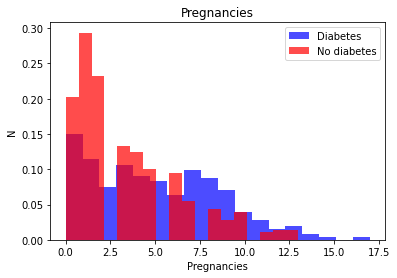

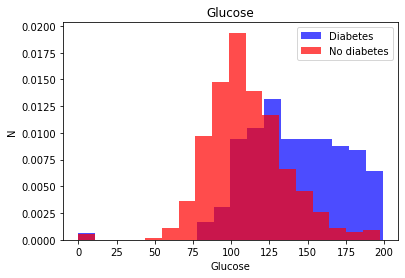

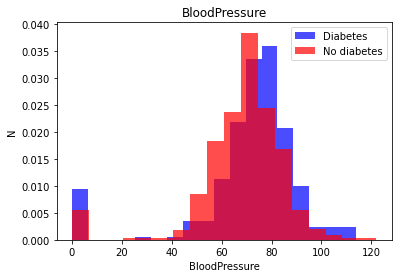

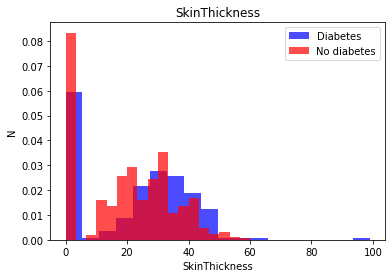

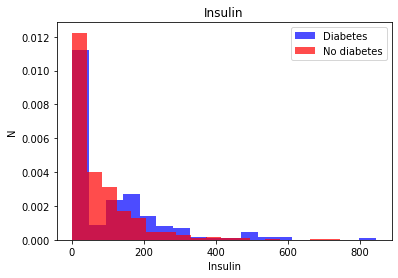

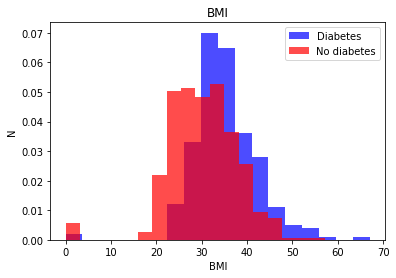

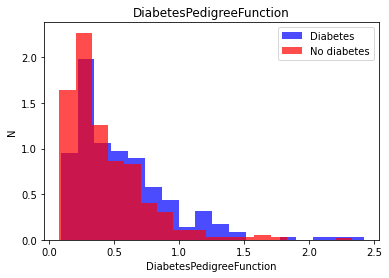

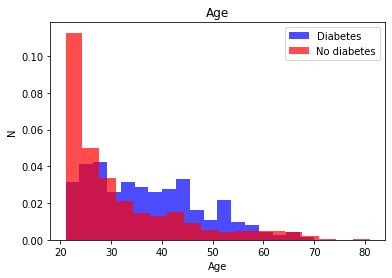

In [5]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
#   Plotting a histograms of when outcomes is 1 or when 2
#   Subsetting a dataframe based on some parameters
#   Normalize the imbalance in outcomes by using density  to compare ratios
    plt.hist(df[df['Outcome'] == 1][label], color='blue', label="Diabetes", alpha=0.7, density=True, bins=18)
    plt.hist(df[df['Outcome'] == 0][label], color='red', label="No diabetes", alpha=0.7, density=True, bins=18)
    plt.title(label)
    plt.ylabel("N")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [6]:
# Splitting our df into an x feature matrix and y outcome vector
# These columns are now numpy arrays
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values


In [7]:
# We are scalling the quantites for all variables to be in the same range
# This will improve our models accuracy 
scaler = StandardScaler()
X = scaler.fit_transform(X)

# We are reshaping the nump array into pandas dataframe for plotting purposes
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [15]:
len(df[df['Outcome']==1]), len(df[df['Outcome']==0])

(268, 500)

In [16]:
# RamdonOverSampler that equalizes the values of the diabetic and non-diabetic
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [19]:
# The values have been random sampled now they are both 500
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

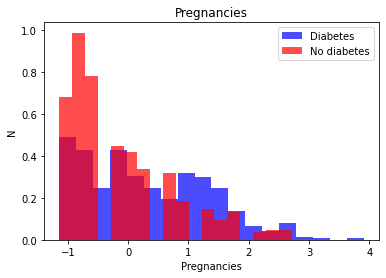

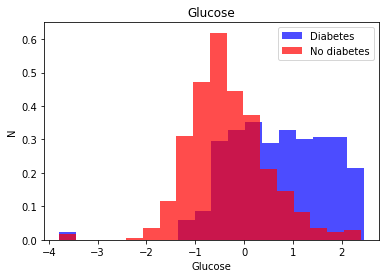

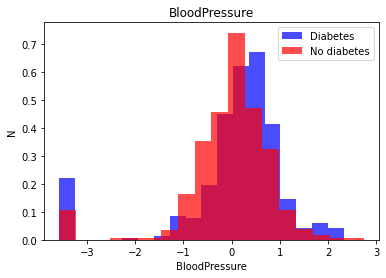

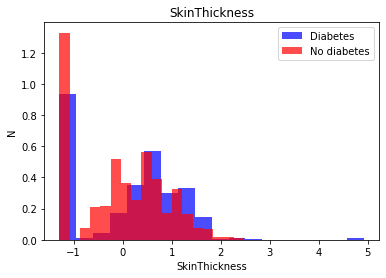

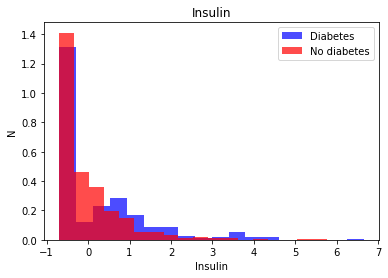

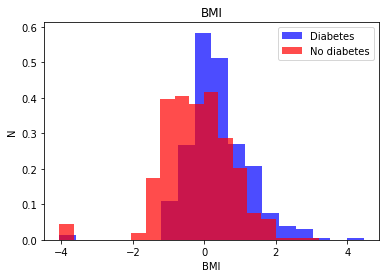

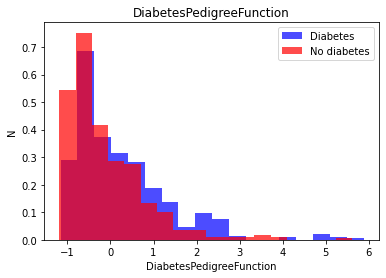

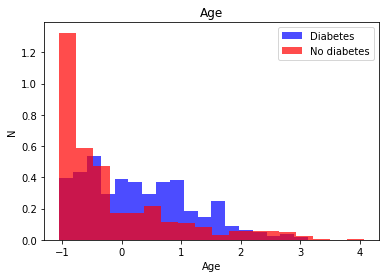

In [20]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
#   Plotting a histograms of when outcomes is 1 or when 2
#   Subsetting a dataframe based on some parameters
#   Normalize the imbalance in outcomes by using density  to compare ratios
    plt.hist(transformed_df[transformed_df['Outcome'] == 1][label], color='blue', label="Diabetes", alpha=0.7, density=True, bins=18)
    plt.hist(transformed_df[transformed_df['Outcome'] == 0][label], color='red', label="No diabetes", alpha=0.7, density=True, bins=18)
    plt.title(label)
    plt.ylabel("N")
    plt.xlabel(label)
    plt.legend()
    plt.show()
    
# The plots visualise scaled variables 

In [21]:
# Using scikit-learn to split the data set inot train set (60%) and a temporary set(40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
# Temporary set is split into two random datasets for validation(50%) of model and test datasets(50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [22]:
# Building the neural-net model using tensorflow keras
# We are using sequential model which groups a linear stack of layers into a tf.keras.Model
model = tf.keras.Sequential([
#     A layer of 16 densly connected neurons, the activation function is Relu
    tf.keras.layers.Dense(16, activation='relu'), 
    tf.keras.layers.Dense(16, activation='relu'), 
    # The sigmoid function guarantess numbers between 0 and 1
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [24]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 1s 3ms/step - loss: 0.6455 - accuracy: 0.5700


[0.6455342173576355, 0.5699999928474426]

In [25]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.5700


[0.6608812808990479, 0.5699999928474426]

In [26]:
# Training the model 
# fitting data to the model, we are setting the batch size(number of samples gone through before a weight change is executed,
# that would go through the model and the number of round we will train the model
# We are also using the validation data to test the accuracy after each epoch
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.6292 - accuracy: 0.6250 - val_loss: 0.6118 - val_accuracy: 0.6950
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5939 - accuracy: 0.7150 - val_loss: 0.5802 - val_accuracy: 0.7650
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5711 - accuracy: 0.7383 - val_loss: 0.5589 - val_accuracy: 0.7650
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5543 - accuracy: 0.7383 - val_loss: 0.5413 - val_accuracy: 0.7650
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5426 - accuracy: 0.7483 - val_loss: 0.5285 - val_accuracy: 0.7600
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5308 - accuracy: 0.7517 - val_loss: 0.5215 - val_accuracy: 0.7550
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5211 - accuracy: 0.7550 - val_loss: 0.5145 - val_accuracy: 0.7450
Epoch 8/20
38/38 [==

In [29]:
# Evaluating the model against the test dataset

model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.7750


[0.4986931085586548, 0.7749999761581421]

## FeedForward Neural Net
* Doesnt work well with sequencial data like weather for the last month. __Text__ in a sentece.


## Recurrent Neural Net
#### Problems with RNNs 
* Exploding Gradients - gradient become to big making the model unpredictable 
* Vanishing Gradients - Model doesn't update and incapable of learning

### Gradient Recurrent Unit
### Long Short-Term Memory(LSTM)